Starting

-10
Going to do run #135
good jets: 104
all jets: 1212
-5
Going to do run #135
good jets: 259
all jets: 1212
0
Going to do run #135
good jets: 359
all jets: 1212
5
Going to do run #135
good jets: 295
all jets: 1212
10
Going to do run #135
good jets: 59
all jets: 1212
done.


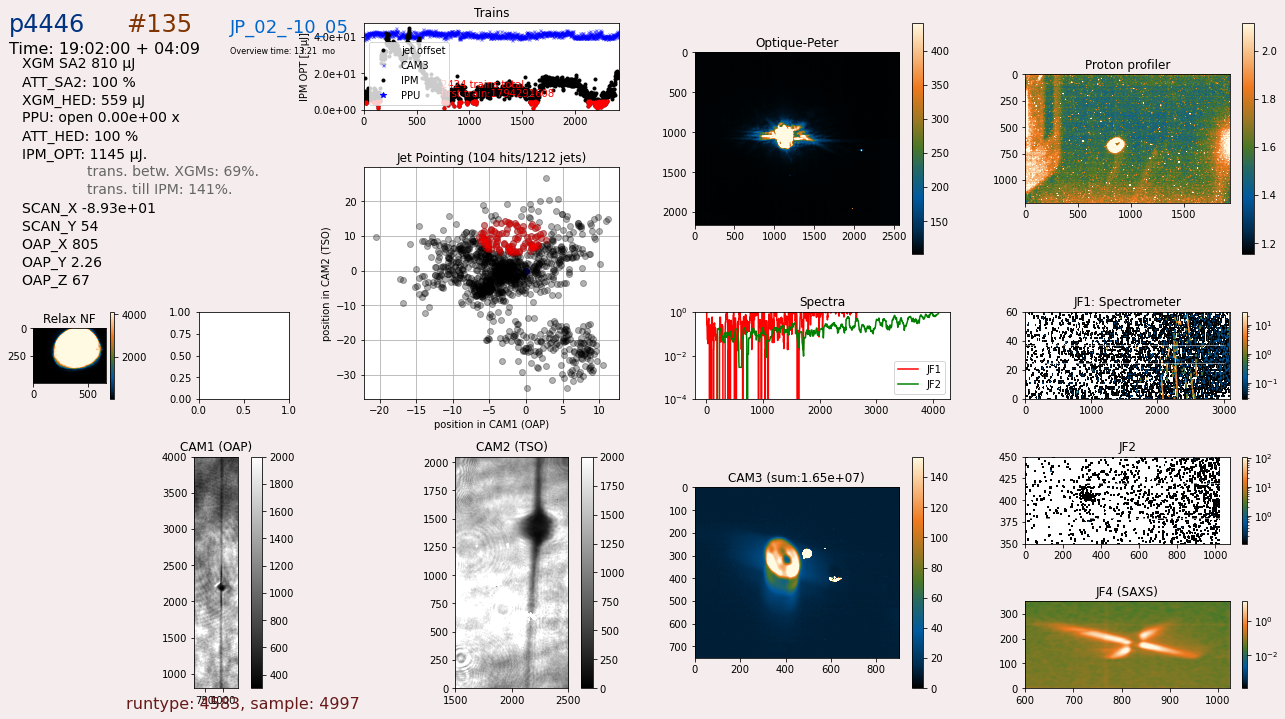

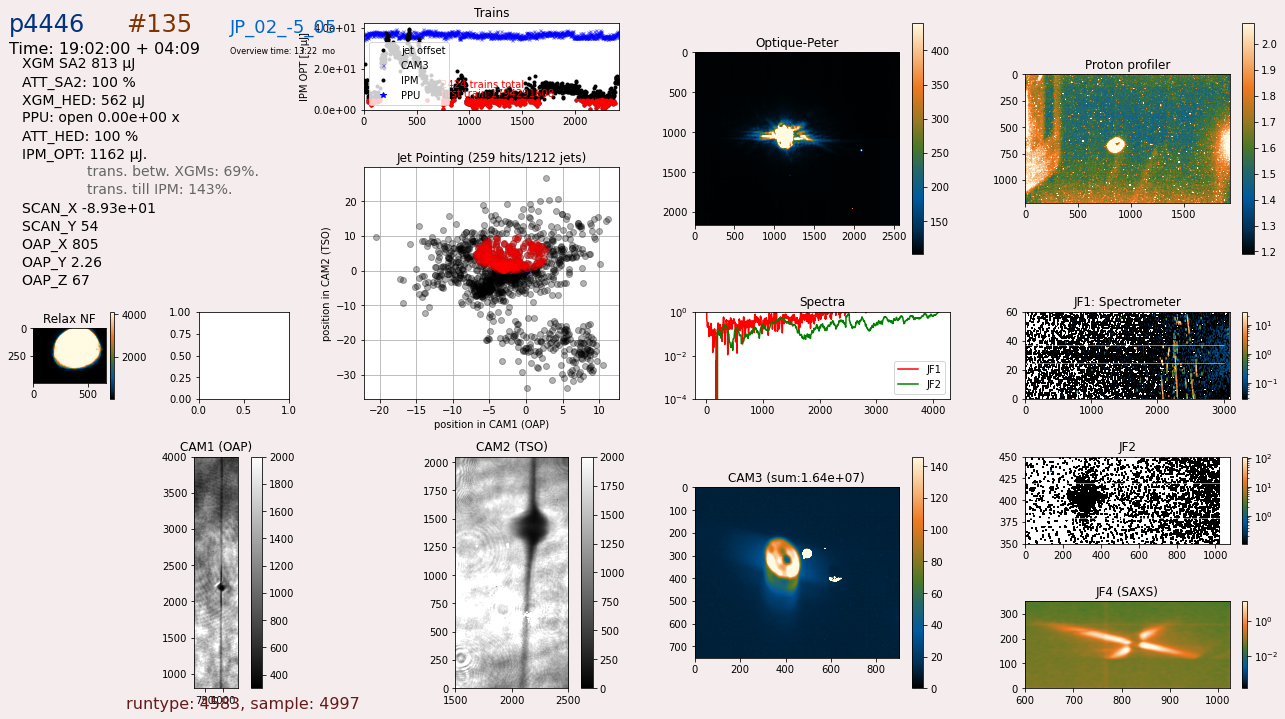

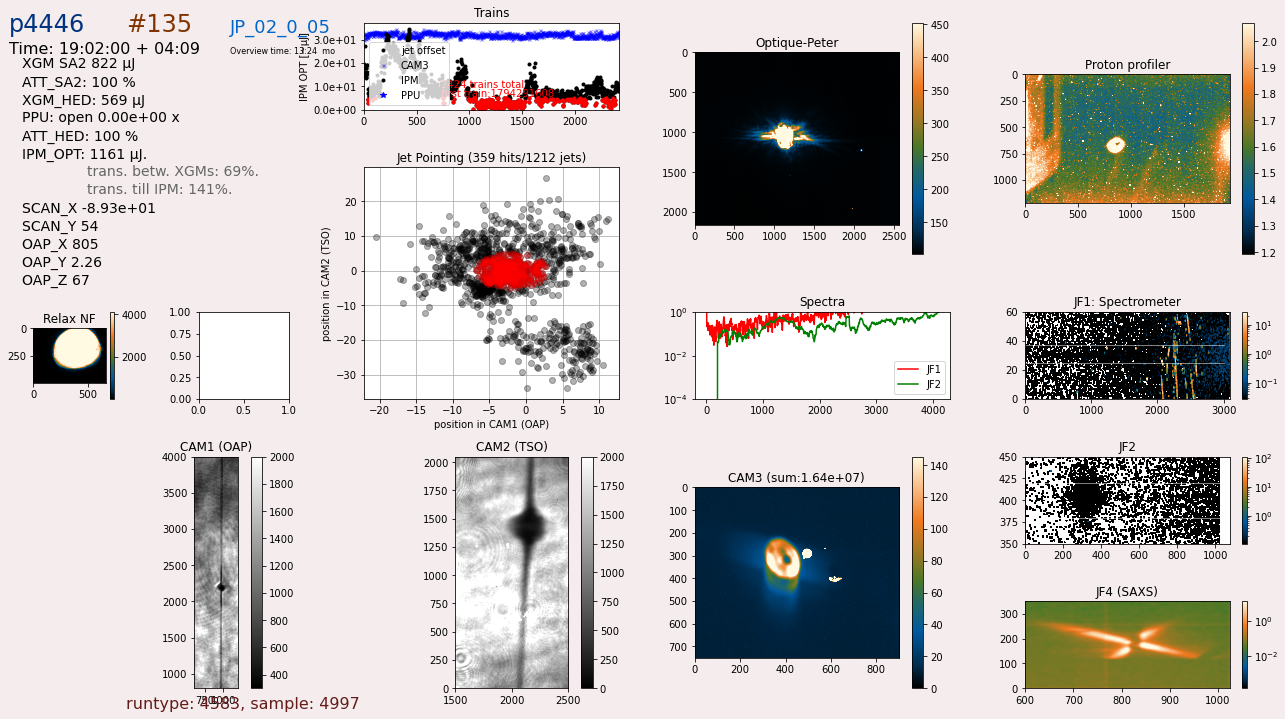

In [66]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sys
sys.path.append('/home/msmid/mmm_HED/')
import numpy as np
import matplotlib.pyplot as plt
import mmmUtils as mu
from importlib import reload 
import extra_mmm as em
import run_overview_lib_4446 as run_overview_lib
reload(em)

proposal=4446
runNos=[135]
print('Starting')

poss=np.arange(-10,12,5)
CAM3s=poss*np.nan
s1s=[]
s2s=[]
for iii in np.arange(1000):
    if np.size(runNos)==1:
        if runNos==0: 
            runNo=em.listen_for_shot(debug=0)
        else:
            if iii==0:
                runNo=runNos[0]
            else:
                break
    else:
        if iii<np.size(runNos):
            runNo=runNos[iii]
        else:
            break
    print('')
    reload(run_overview_lib)
    #for train_selection in train_selections:
    for xi,pos in enumerate(poss):
        print(pos)
#        train_selection='JP_{:.0f}_00_03'.format(pos)
        train_selection='JP_02_{:.0f}_05'.format(pos)
        CAM3_sum,s1,s2=run_overview_lib.overview_figure_A(proposal,runNo,debug=0,generator='mo',recalc=0,train_selection=train_selection)
        CAM3s[xi]=CAM3_sum
        s1s.append(s1)
        s2s.append(s2)
print('done.')

In [57]:
CAM3s[0]=np.nan
plt.plot(poss,CAM3s,'*-')
plt.xlabel('Jet offset in CAM1 (perp. to Relax)')
plt.ylabel('Signal on CAM3')
plt.grid()
plt.title('Run {:}'.format(runNo))

Text(0.5, 1.0, 'Run 138')

In [ ]:
plt.title('JF1 spectra')
for i,sp1 in enumerate(s1s):
    sp1=mu.smooth(sp1,51)    
    plt.semilogy(sp1,label="{:}".format(poss[i]))
plt.ylim(1e-1,3)


(0.1, 3)

In [70]:
plt.title('JF2 spectra, run {:}, various jet Y positions'.format(runNo))
for i,sp in enumerate(s2s):
    if poss[i]<-9:continue
    if poss[i]>9:continue
    sp[550:]=0
    sp=mu.smooth(sp,21)
    sp=sp/np.max(sp)
    plt.plot(sp,label="{:}".format(poss[i]))
plt.xlim(100,500)
plt.ylim(1e-1,1)
plt.legend()

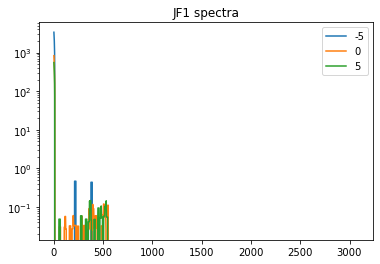

In [51]:
plt.title('JF1 spectra')
for i,sp in enumerate(s1s):
    if poss[i]<-5:continue
#    sp[550:]=0
#    sp=sp/np.max(sp)
    plt.semilogy(sp,label="{:}".format(poss[i]))
#plt.xlim(100,500)
plt.legend()